# **Conjunto de Dados de Ações de empresas do ramo Energético na B3** <p>

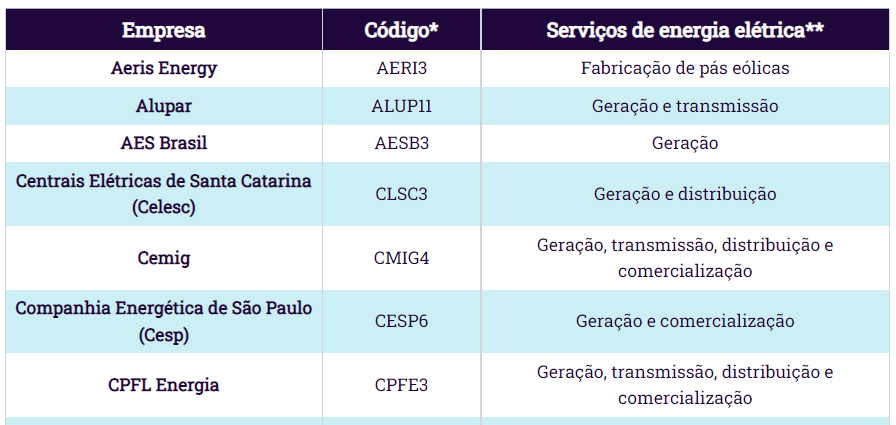

**Download da base de dados** <p>
[Download no Driver](https://docs.google.com/spreadsheets/d/17MY7JjoeDV-c8lZN4KIjiVEUBIilPXBV/edit?usp=sharing&ouid=101707831224147120634&rtpof=true&sd=true)

In [1]:
# Libs Necessárias

# Libs para Modelagem e Matrizes
import numpy as np
import pandas as pd

# Libs para análises gráficas
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

# Libs para utilizar o Plotly
import plotly.express as px
import plotly.graph_objects as dash

# Lib para ignorar avisos
import warnings

# Desabilitando avisos
warnings.filterwarnings('ignore')

## Acessando as cotações atualizadas das ações

Usarei a seguinte biblioteca:
- pandas_datareader

Extrairemos as cotações do Yahoo Finance.

In [28]:
import pandas_datareader.data as pdr
import yfinance

yfinance.pdr_override()

In [37]:
tickers = ['PETR4.SA', 'AERI3.SA', 'ALUP11.SA', 'AESB3.SA', 'CLSC3.SA', 'CMIG4.SA', 'CPFE3.SA']

base_dados = pdr.get_data_yahoo(tickers, start='2021-03-22', end='2024-04-28')['Close']
base_dados.head()

[*********************100%%**********************]  7 of 7 completed


Ticker,AERI3.SA,AESB3.SA,ALUP11.SA,CLSC3.SA,CMIG4.SA,CPFE3.SA,PETR4.SA
Date,,,,,,,
2021-03-22,9.28,NaN,22.744081,58.900002,8.492819,31.10,23.520000
2021-03-23,8.94,NaN,23.030695,58.900002,8.492819,30.75,22.799999
2021-03-24,9.02,NaN,22.753328,58.900002,8.320341,30.00,22.820000
2021-03-25,9.20,NaN,23.104658,58.900002,8.582508,30.77,23.200001
2021-03-26,9.10,NaN,23.391272,58.900002,8.575609,30.27,23.459999


In [38]:
base_dados = base_dados.rename(columns={
    'AERI3.SA': 'Aeris Energy',
    'AESB3.SA': 'AES Brasil',
    'ALUP11.SA': 'Alupar',
    'CLSC3.SA': 'Celesc',
    'CMIG4.SA': 'Cemig',
    'CPFE3.SA': 'CPFL',
    'PETR4.SA': 'Petrobras'
})

In [39]:
base_dados.columns

Index(['Aeris Energy', 'AES Brasil', 'Alupar', 'Celesc', 'Cemig', 'CPFL',
       'Petrobras'],
      dtype='object', name='Ticker')

In [40]:
base_dados = base_dados[[
    'Petrobras',
    'Aeris Energy',
    'Alupar',
    'AES Brasil',
    'Cemig',
    'Celesc',
    'CPFL']]

In [41]:
# Lendo a base de dados
base_dados.head(10)

Ticker,Petrobras,Aeris Energy,Alupar,AES Brasil,Cemig,Celesc,CPFL
Date,,,,,,,
2021-03-22,23.520000,9.28,22.744081,NaN,8.492819,58.900002,31.10
2021-03-23,22.799999,8.94,23.030695,NaN,8.492819,58.900002,30.75
2021-03-24,22.820000,9.02,22.753328,NaN,8.320341,58.900002,30.00
2021-03-25,23.200001,9.20,23.104658,NaN,8.582508,58.900002,30.77
2021-03-26,23.459999,9.10,23.391272,NaN,8.575609,58.900002,30.27
2021-03-29,23.830000,9.00,23.557692,16.455292,8.830876,58.900002,29.82
2021-03-30,23.830000,8.91,23.613165,17.204144,8.934363,58.900002,30.09
2021-03-31,24.100000,8.84,23.714867,16.922108,8.989556,58.900002,30.42
2021-04-01,23.889999,8.53,23.594673,16.533094,8.810179,58.900002,30.02


In [42]:
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 774 entries, 2021-03-22 to 2024-04-26
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Petrobras     774 non-null    float64
 1   Aeris Energy  774 non-null    float64
 2   Alupar        774 non-null    float64
 3   AES Brasil    769 non-null    float64
 4   Cemig         774 non-null    float64
 5   Celesc        774 non-null    float64
 6   CPFL          774 non-null    float64
dtypes: float64(7)
memory usage: 48.4 KB


In [ ]:
# Setando o index como a data
base_dados.set_index('Date', inplace=True)
base_dados.head()

## Gráfico

Text(0, 0.5, 'Preço de Fechamento (R$)')

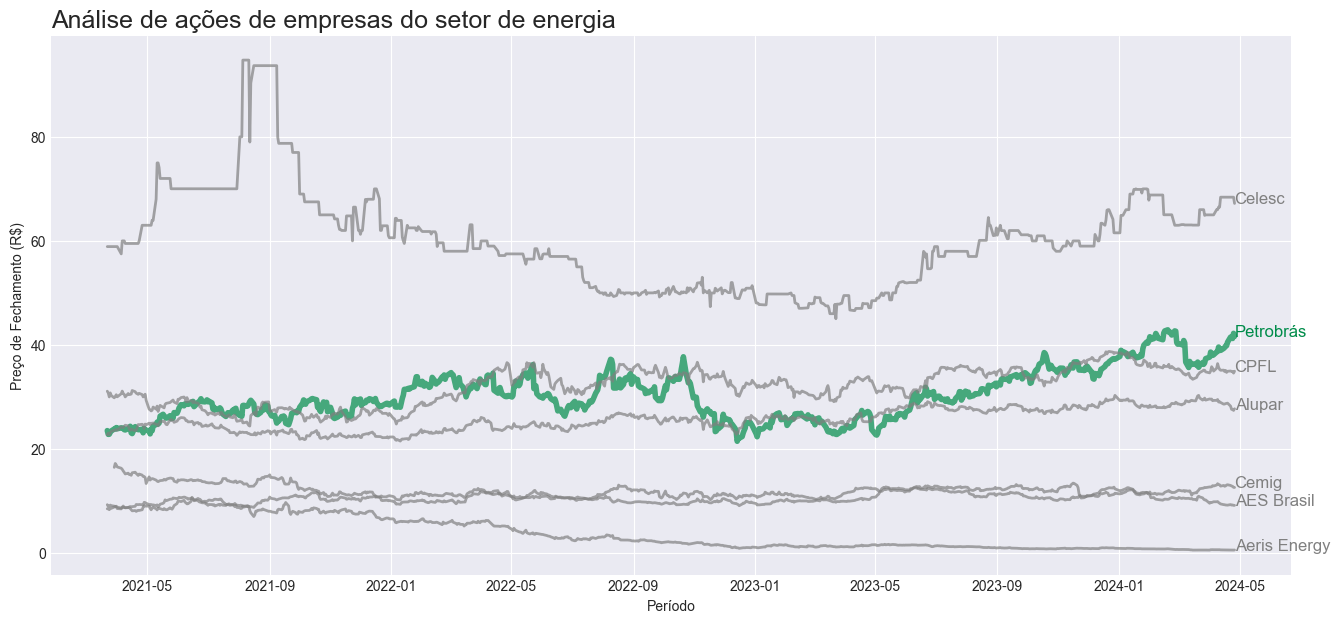

In [47]:
# Estilo do gráfico
plt.style.use('seaborn-v0_8-darkgrid')

# Tamanho
plt.figure(figsize=(16,7))

# Título
plt.title('Análise de ações de empresas do setor de energia', loc='left', fontsize=18, fontweight=0)

# Plot da Petrobrás
plt.plot(base_dados.index, base_dados['Petrobras'], color='#008c4a', linewidth=4, alpha=0.7)
# Texto da Petrobrás
plt.text(base_dados.index[-1], base_dados['Petrobras'].tail(1), 'Petrobrás', color='#008c4a', size='large', horizontalalignment='left')

# Plot de todas as colunas
for coluna in base_dados.columns[1:]:
    # Plot das outras ações
    plt.plot(base_dados.index, base_dados[coluna], color='gray', linewidth=2, alpha=0.7)
    # Texto das outras colunas
    plt.text(base_dados.index[-1], base_dados[coluna].tail(1), f'{coluna}', color='gray', size='large', horizontalalignment='left')

# Labels
plt.xlabel('Período')
plt.ylabel('Preço de Fechamento (R$)')

# Analisando as ações de alguns bancos:

In [50]:
tickers_bancos = ['BBAS3.SA',
'BBDC4.SA',
'ITUB4.SA',
'SANB11.SA',
'ABCB4.SA',
'BPAC11.SA',
'BRSR6.SA',
'BPAN4.SA']

base_dados_bancos = pdr.get_data_yahoo(tickers_bancos, start='2021-04-28', end='2024-04-28')['Close']
base_dados_bancos.head()

[*********************100%%**********************]  8 of 8 completed


Ticker,ABCB4.SA,BBAS3.SA,BBDC4.SA,BPAC11.SA,BPAN4.SA,BRSR6.SA,ITUB4.SA,SANB11.SA
Date,,,,,,,,
2021-04-28,14.519671,15.150,22.354546,26.607500,18.200001,12.35,28.209999,39.122166
2021-04-29,14.657019,14.820,21.609091,26.557501,17.870001,12.25,27.320000,37.470875
2021-04-30,14.519671,14.820,21.681818,26.750000,18.389999,12.25,27.530001,37.086853
2021-05-03,14.666830,14.875,22.327272,27.972500,18.910000,12.20,27.900000,37.710888
2021-05-04,14.500050,14.685,21.636362,26.887501,18.379999,12.19,26.709999,36.683632


In [52]:
base_dados_bancos = base_dados_bancos.rename(columns={
    'BBAS3.SA': 'Banco do Brasil',
    'BBDC4.SA': 'Bradesco',
    'ITUB4.SA': 'Itaú Unibanco',
    'SANB11.SA': 'Santander',
    'ABCB4.SA': 'Banco ABC',
    'BPAC11.SA': 'BTG Pactual',
    'BRSR6.SA': 'Banrisul',
    'BPAN4.SA': 'Banco Pan'
})
base_dados_bancos.head()

Ticker,Banco ABC,Banco do Brasil,Bradesco,BTG Pactual,Banco Pan,Banrisul,Itaú Unibanco,Santander
Date,,,,,,,,
2021-04-28,14.519671,15.150,22.354546,26.607500,18.200001,12.35,28.209999,39.122166
2021-04-29,14.657019,14.820,21.609091,26.557501,17.870001,12.25,27.320000,37.470875
2021-04-30,14.519671,14.820,21.681818,26.750000,18.389999,12.25,27.530001,37.086853
2021-05-03,14.666830,14.875,22.327272,27.972500,18.910000,12.20,27.900000,37.710888
2021-05-04,14.500050,14.685,21.636362,26.887501,18.379999,12.19,26.709999,36.683632


Text(0, 0.5, 'Preço de Fechamento (R$)')

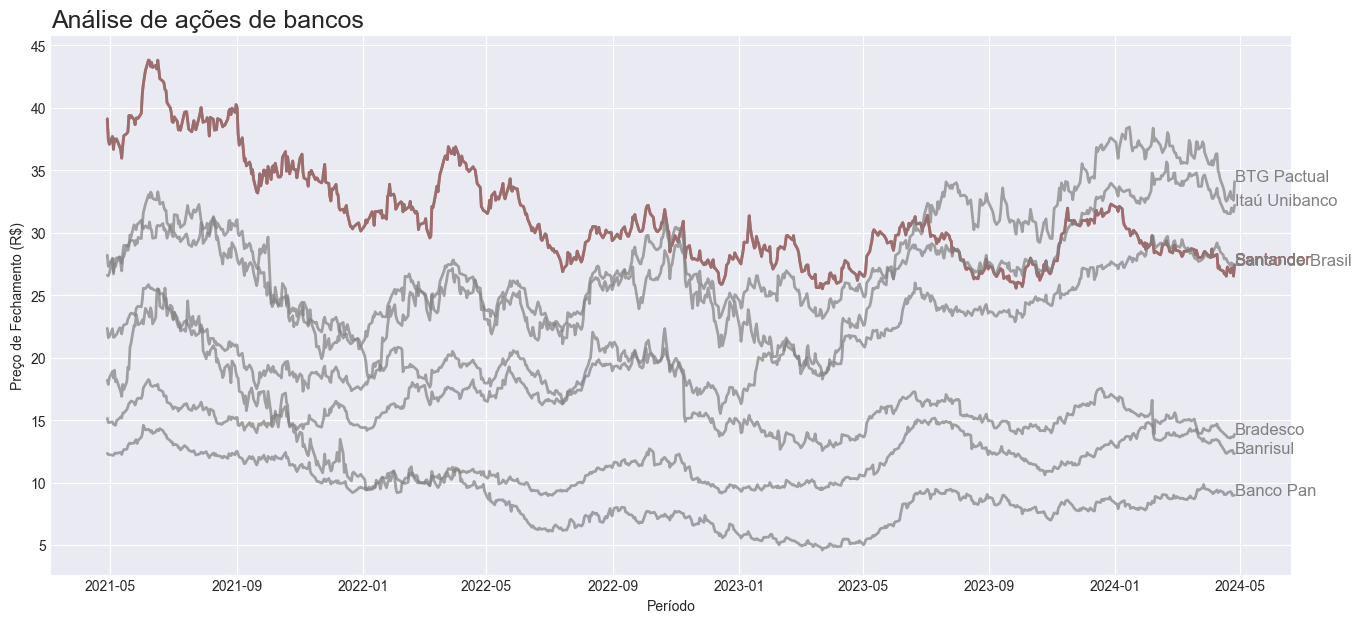

In [56]:
# Estilo do gráfico
plt.style.use('seaborn-v0_8-darkgrid')

# Tamanho
plt.figure(figsize=(16,7))

# Título
plt.title('Análise de ações de bancos', loc='left', fontsize=18, fontweight=0)

# Plot do Santander
plt.plot(base_dados_bancos.index, base_dados_bancos['Santander'], color='#CC0000', linewidth=2, alpha=0.7)
# Texto do Santander
plt.text(base_dados_bancos.index[-1], base_dados_bancos['Santander'].tail(1), 'Santander', color='#CC0000', size='large', horizontalalignment='left')

# Plot de todas as colunas
for coluna in base_dados_bancos.columns[1:]:
    # Plot das outras ações
    plt.plot(base_dados_bancos.index, base_dados_bancos[coluna], color='gray', linewidth=2, alpha=0.7)
    # Texto das outras colunas
    plt.text(base_dados_bancos.index[-1], base_dados_bancos[coluna].tail(1), f'{coluna}', color='gray', size='large', horizontalalignment='left')

# Labels
plt.xlabel('Período')
plt.ylabel('Preço de Fechamento (R$)')